Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
column_header=["State","Account Length","Area Code","Phone","International Plan","VMail Plan","VMail Message","Day Mins","Day Calls","Day Charge","Eve Mins","Eve Calls","Eve Charge","Night Mins","Night Calls","Night Charge","International Mins","International calls","International Charge","CustServ Calls","Churn"]

Reading and storing the data

In [3]:
data=pd.read_csv("telecom_churn_data.txt", delimiter=",",header=None,names=column_header,index_col=False)

In [4]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account Length          4617 non-null int64
Area Code               4617 non-null int64
Phone                   4617 non-null object
International Plan      4617 non-null object
VMail Plan              4617 non-null object
VMail Message           4617 non-null int64
Day Mins                4617 non-null float64
Day Calls               4617 non-null int64
Day Charge              4617 non-null float64
Eve Mins                4617 non-null float64
Eve Calls               4617 non-null int64
Eve Charge              4617 non-null float64
Night Mins              4617 non-null float64
Night Calls             4617 non-null int64
Night Charge            4617 non-null float64
International Mins      4617 non-null float64
International calls     4617 non-null int64
International Charge    4617 non-null float64
CustServ Calls          4617 non-null

In [6]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
data.shape

(4617, 21)

In [8]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000164D5DD6438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000164D64209B0>]], dtype=object)

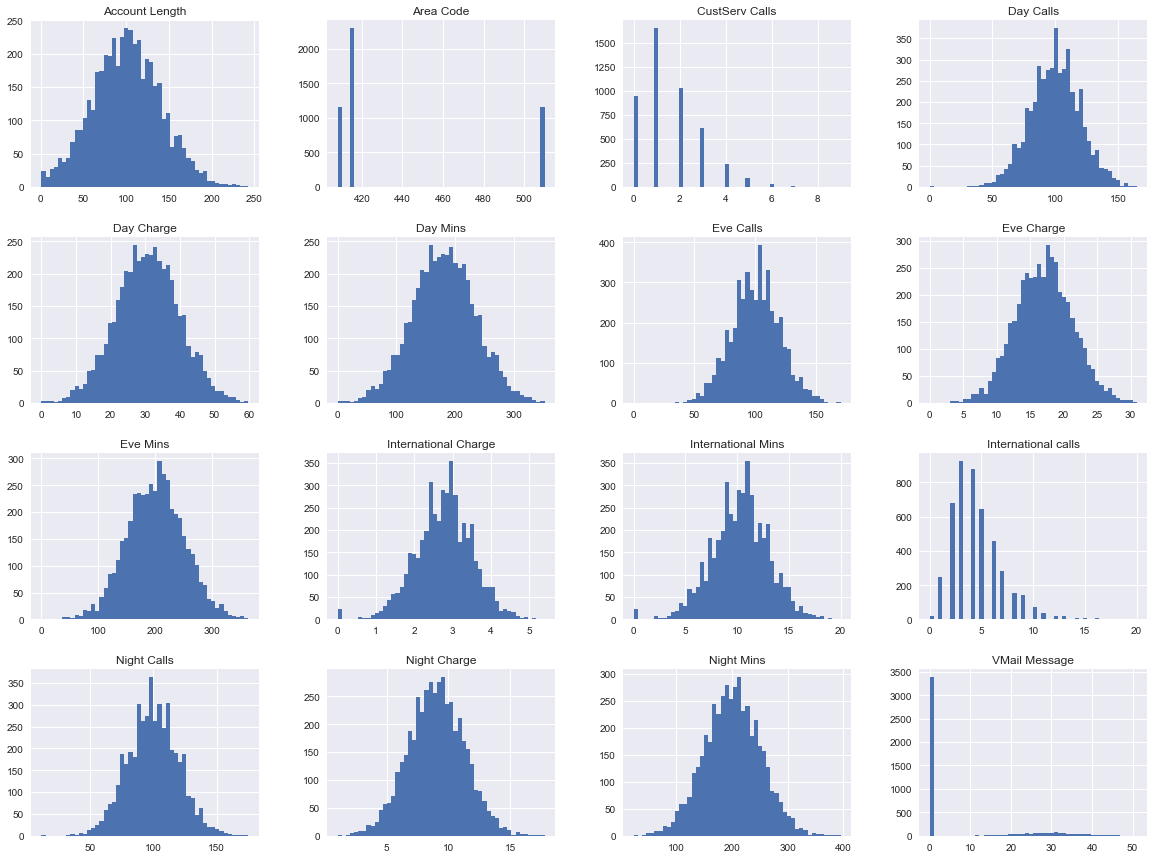

In [9]:
data.hist(bins=50, figsize=(20,15))

In [10]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

Plotting graphs to find the relationships between the features and the customer churn(target variable).

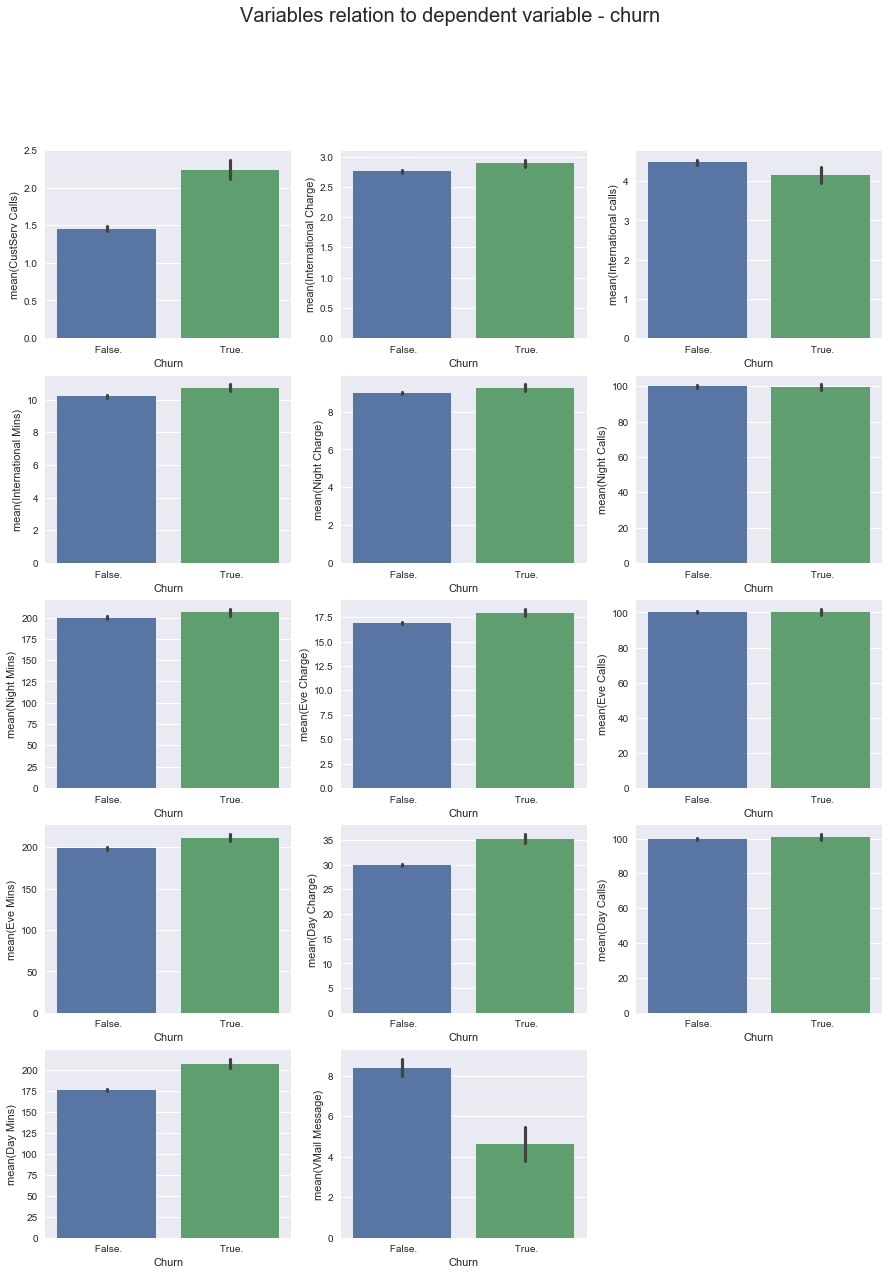

In [11]:
plt.figure(figsize = (15,20))
plt.subplot(5,3,1)
sns.barplot(data['Churn'], data['CustServ Calls'])
plt.subplot(5,3,2)
sns.barplot(data['Churn'], data['International Charge'])
plt.subplot(5,3,3)
sns.barplot(data['Churn'], data['International calls'])
plt.subplot(5,3,4)
sns.barplot(data['Churn'], data['International Mins'])
plt.subplot(5,3,5)
sns.barplot(data['Churn'], data['Night Charge'])
plt.subplot(5,3,6)
sns.barplot(data['Churn'], data['Night Calls'])
plt.subplot(5,3,7)
sns.barplot(data['Churn'], data['Night Mins'])
plt.subplot(5,3,8)
sns.barplot(data['Churn'], data['Eve Charge'])
plt.subplot(5,3,9)
sns.barplot(data['Churn'], data['Eve Calls'])
plt.subplot(5,3,10)
sns.barplot(data['Churn'], data['Eve Mins'])
plt.subplot(5,3,11)
sns.barplot(data['Churn'], data['Day Charge'])
plt.subplot(5,3,12)
sns.barplot(data['Churn'], data['Day Calls'])
plt.subplot(5,3,13)
sns.barplot(data['Churn'], data['Day Mins'])
plt.subplot(5,3,14)
sns.barplot(data['Churn'], data['VMail Message'])
plt.suptitle("Variables relation to dependent variable - churn", fontsize = 20)
plt.show()

Except, CustServ Calls and VMail Message, there doesn't seem to be a link between most of the feature and the target class. This specifies the need for more features to analyze the correlation. Even w.r.t Custservice Call we need an extra feature that shows if the issue the customers issue for was resolved. This can give us a more clear understanding of the correlation between CustomerServ Calls and Churn.

Looking at the correlation between call rates and churn, there is a small link between Day Charge and Customer churn. The higher the call rates in the morning the higher the chances for the customer to churn but this cannot be used as a substantial evidence.

# Modelling

In [12]:
data_1=data.drop(["State","Area Code","Phone"],axis=1)

In [13]:
X = data_1.drop(['Churn'],axis=1).values
y = data_1['Churn'].values

Encoding the independent categorical variables-X

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

Encoding the independent categorical variables-y

In [15]:
labelencoder_y = LabelEncoder()
y=labelencoder_y.fit_transform(y)

Splitting the dataset

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Users\prathik\Anaconda3.6\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\prathik\Anaconda3.6\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy and precision function-

In [18]:
def accuracy_precision(cm):
    tp, fn, fp, tn = cm.ravel()
    accuracy=(tp+tn)/cm.sum()
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    print("The accuracy of the model is %s:" %accuracy)
    print("The precision of the model is %s:" %precision)
    print("The recall of the model is %s:" %recall)

# Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=42)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Calculating the accuracy of the training set

In [20]:
y_train_predict=classifier.predict(X_train)
cm_train=confusion_matrix(y_train,y_train_predict)
accuracy_precision(cm_train)

The accuracy of the model is 0.861929520508:
The precision of the model is 0.878547451938:
The recall of the model is 0.972963839135:


Calculating the accuracy of the test set

In [21]:
y_test_predict=classifier.predict(X_test)
cm_test=confusion_matrix(y_test,y_test_predict)
accuracy_precision(cm_test)

The accuracy of the model is 0.869264069264:
The precision of the model is 0.888584474886:
The recall of the model is 0.971057884232:


# SVC

Using SVC without using dimensionality reduction first takes a lot of computation time, therefore using PCA for feature extraction. 

PCA

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [23]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',C=100,random_state=42)
#parameters=[{'C':[1,10,100,1000],'kernel':['linear','rbf']}]
#grid_search=GridSearchCV(estimator=classifier, param_grid=parameters,scoring='roc_auc',cv=10, n_jobs=-1)
classifier.fit(X_train_pca,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

Using GridSearchCV for SVC is computationally intensive , therefore only results obtained using the best parameters(based on multiple trials) are displayed below.

In [24]:
y_train_predict=classifier.predict(X_train_pca)
cm_train=confusion_matrix(y_train,y_train_predict)
accuracy_precision(cm_train)

The accuracy of the model is 0.996244945118:
The precision of the model is 0.99595959596:
The recall of the model is 0.999662047989:


In [25]:
y_test_predict=classifier.predict(X_test_pca)
cm_test=confusion_matrix(y_test,y_test_predict)
accuracy_precision(cm_test)

The accuracy of the model is 0.909090909091:
The precision of the model is 0.953488372093:
The recall of the model is 0.941117764471:


# Decision Tree with GridSearchCV

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]
grid_search_dt=GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc',cv=10, n_jobs=-1)
grid_search_dt=grid_search_dt.fit(X_train,y_train)
best_score=grid_search_dt.best_score_
best_parameters=grid_search_dt.best_params_

In [27]:
best_score

0.85092384972115354

In [28]:
best_parameters

{'criterion': 'gini', 'min_samples_split': 5}

Training Set accuracy

In [29]:
y_train_predict=grid_search_dt.predict(X_train)
cm_train=confusion_matrix(y_train,y_train_predict)
accuracy_precision(cm_train)

The accuracy of the model is 0.989890236857:
The precision of the model is 0.991593813046:
The recall of the model is 0.996620479892:


Test Set Accuracy

In [30]:
y_test_predict=grid_search_dt.predict(X_test)
cm_test=confusion_matrix(y_test,y_test_predict)
accuracy_precision(cm_test)

The accuracy of the model is 0.930735930736:
The precision of the model is 0.961:
The recall of the model is 0.959081836327:


# Random Forest with GridSearchCV

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier=RandomForestClassifier(random_state=42,n_estimators=23)
parameters=[{'min_samples_split':[2,3],'criterion':['gini','entropy'],'min_samples_leaf':[1,2]}]
grid_search_rf=GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',cv=10, n_jobs=-1)
grid_search_rf.fit(X_train,y_train)
best_score=grid_search_rf.best_score_
best_parameters=grid_search_rf.best_params_


In [32]:
best_score

0.95522819179664931

In [33]:
best_parameters

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}

Training set Acccuracy

In [34]:
y_train_predict=grid_search_rf.predict(X_train)
cm_train=confusion_matrix(y_train,y_train_predict)
accuracy_precision(cm_train)

The accuracy of the model is 0.999133448873:
The precision of the model is 0.998987170831:
The recall of the model is 1.0:


Test Set Accuracy

In [35]:
y_test_predict=grid_search_rf.predict(X_test)
cm_test=confusion_matrix(y_test,y_test_predict)
accuracy_precision(cm_test)

The accuracy of the model is 0.957575757576:
The precision of the model is 0.962172647915:
The recall of the model is 0.99001996008:
